# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Importing relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visiting the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Creating a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extracting all rows of data
table_data = soup.find('table')
row_data = table_data.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Creating an empty list
table_list = []
# Looping through the scraped data for Header list creation
rows = table_data.find('tr')
row_heading = rows.find_all('th')
for row in row_heading:
    row_head = row.text
    table_list.append(row_head)

In [7]:
# Using dictionary to save scraped data with column header as key    
weather_dict= {key: [] for key in table_list}
for row in row_data:
    count = 0
    td = row.find_all('td')
    for x in td:
        weather_dict[table_list[count]].append(x.text)
        count+=1
# Creating a Pandas DataFrame from dictionary
mars_df = pd.DataFrame(weather_dict)


In [8]:
# Confirming DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.
;
  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examining data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Changing data types as required and confirming changes were successful by examining data types again
mars_df = mars_df.astype({'sol':'int', 'ls': 'int', 'month':'int', 'min_temp': 'float', 
                          'pressure':'float'})
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
months = mars_df.groupby('month')['month'].count()
months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

#### There seem to be 12 months in Mars from the Data vailable

In [12]:
# 2. How many Martian days' worth of data are there?
mars_df['terrestrial_date'].count()

1867

#### There are 1867 martian days of data 

In [13]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_df.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

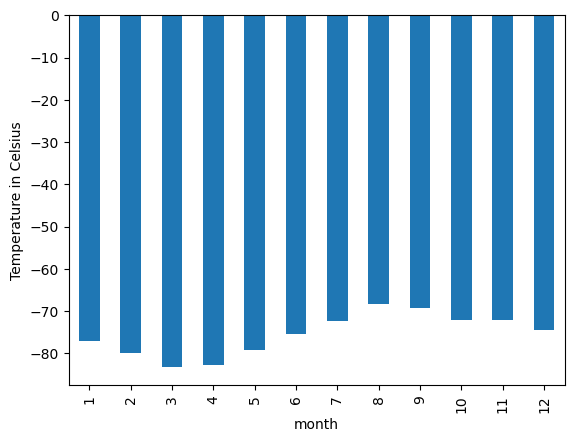

In [14]:
# Plot the average temperature by month
fig1 = avg_low_temp.plot(kind="bar")
fig1.set_ylabel("Temperature in Celsius")
plt.show()

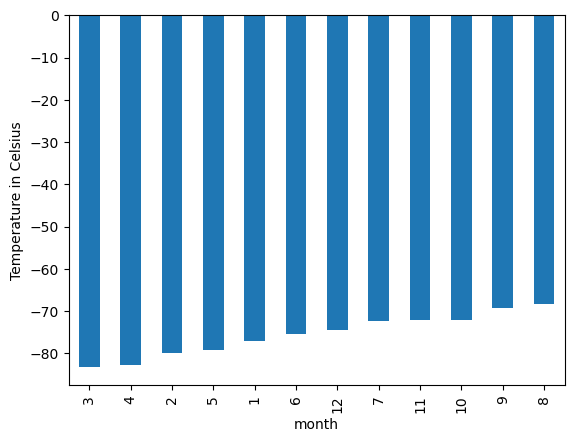

In [15]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp_sort = avg_low_temp.sort_values()
fig2 = avg_low_temp_sort.plot(kind="bar")
fig2.set_ylabel("Temperature in Celsius")
plt.show()

#### On average, the third month has the coldest minimum temperature (-83.3 Celsius) on Mars, and the eighth month is the warmest (-68.4 Celsius). But it is always very cold there in human terms!


In [16]:
# 4. Average pressure by Martian month
avg_pre = mars_df.groupby('month')['pressure'].mean()
avg_pre

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

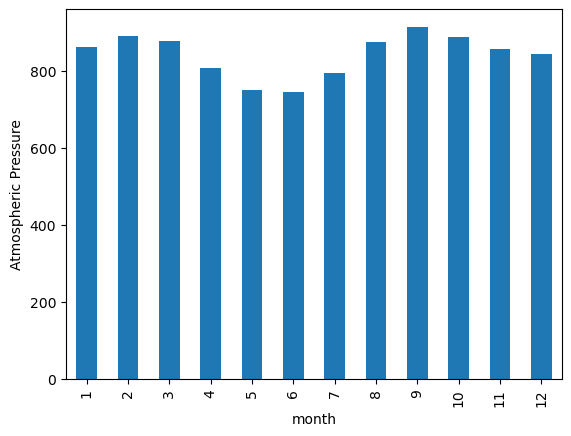

In [17]:
# Plot the average pressure by month
fig3 = avg_pre.plot(kind="bar")
fig3.set_ylabel("Atmospheric Pressure")
plt.show()

#### Atmospheric pressure is, on average, lowest in the sixth month (745.05) and highest in the ninth (913.31).

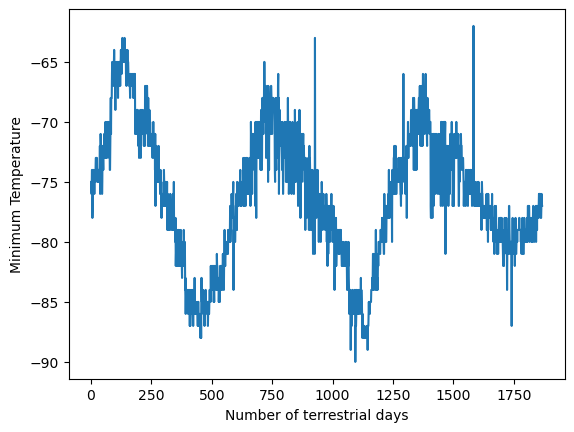

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
avg_temp_df = mars_df[['min_temp']]
avg_temp_df.index = avg_temp_df.index + 1
avg_temp_df
fig4 = avg_temp_df.plot(legend=False)
fig4.set_xlabel("Number of terrestrial days")
fig4.set_ylabel("Minimum Temperature")
plt.show()

#### The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

#### Summary of observations:
- On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!


- Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

- The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_df.to_csv("Output/mars_weather.csv", index=False, header=True)

In [22]:
browser.quit()